# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [53]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df=pd.read_excel('GermanCredit.xlsx')

df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [4]:
df1=df.copy()

In [14]:
df1.dtypes

Creditability               int64
CreditAmount                int64
DurationOfCreditInMonths    int64
dtype: object

In [15]:
df1.isnull().sum().sum()

0

# 2. Check how many records do we have


In [7]:
print('Number of records in the dataset:',df1.shape[0])

Number of records in the dataset: 1000


# 3. Plot Histogram for column 'CreditAmount'

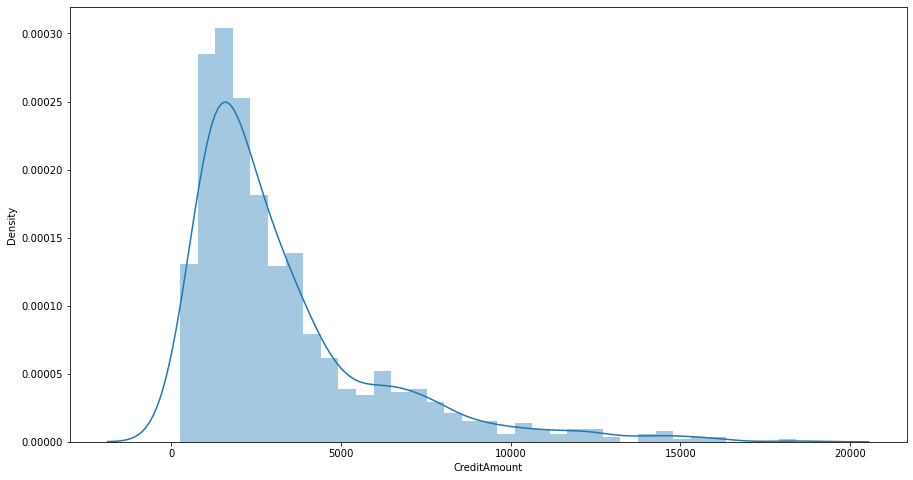

In [12]:
plt.figure(figsize=[15,8])

sns.distplot(a=df1['CreditAmount'])

plt.show()

**Interpretation:** variable `CreditAmount` distribution is right skewed.

In [19]:
df1['DurationOfCreditInMonths'].nunique()

33

# 3b. Create creditability dataframe

In [17]:
creditability0=df1[df1['Creditability']==0]

creditability1=df1[df1['Creditability']==1]

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [109]:
creditability0.reset_index(drop=True,inplace=True)

creditability1.reset_index(drop=True,inplace=True)

In [112]:
conc=pd.concat([creditability0,creditability1],axis=0)

In [114]:
np.sum(conc['CreditAmount'])

3271248

In [115]:
np.sum(conc['DurationOfCreditInMonths'])

20903

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:xlabel='Creditability', ylabel='CreditAmount'>

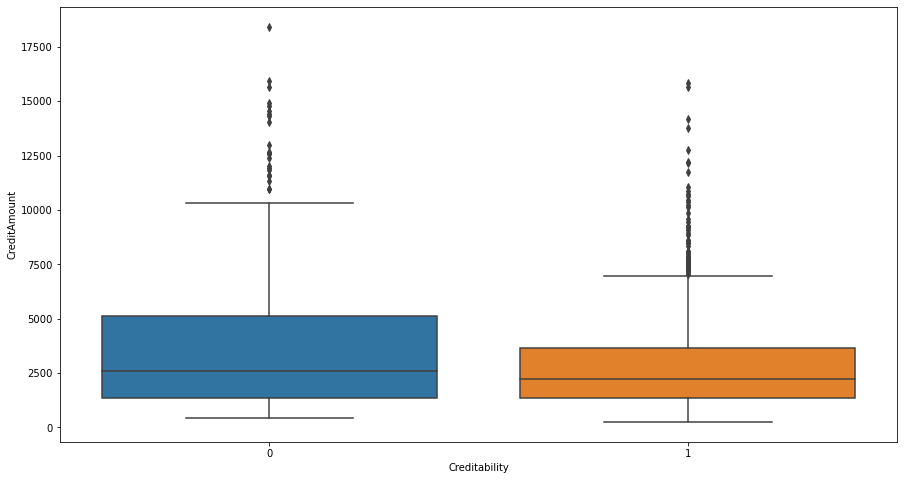

In [21]:
sns.boxplot(x='Creditability',y='CreditAmount',data=df1)

<AxesSubplot:xlabel='Creditability', ylabel='DurationOfCreditInMonths'>

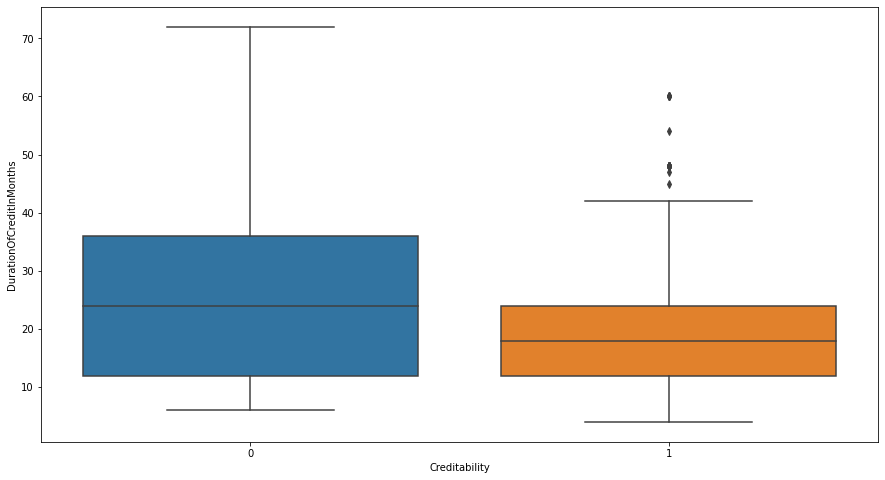

In [22]:
sns.boxplot(x='Creditability',y='DurationOfCreditInMonths',data=df1)

**Interpretation:** As we can see from above creditability=1 has lower range of creditamount and lower range of duration of credit

# 6. Prepare input data for the model

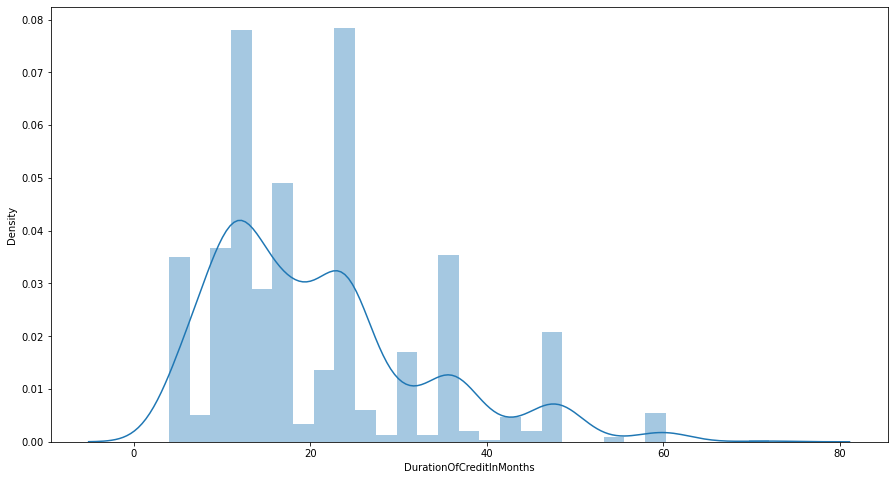

In [24]:
plt.figure(figsize=[15,8])

sns.distplot(a=df1['DurationOfCreditInMonths'])

plt.show()

In [25]:
df1.skew()

Creditability              -0.874183
CreditAmount                1.949594
DurationOfCreditInMonths    1.094184
dtype: float64

In [26]:
df1[['CreditAmount','DurationOfCreditInMonths']]=np.log(df1[['CreditAmount','DurationOfCreditInMonths']])

In [27]:
df1.skew()

Creditability              -0.874183
CreditAmount                0.129134
DurationOfCreditInMonths   -0.127414
dtype: float64

In [29]:
X=df1.drop('Creditability',axis=1)

y=df1['Creditability']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = 0.3,stratify=y)

print('X_train', X_train.shape)
print('y_train', y_train.shape)


print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (700, 2)
y_train (700,)
X_test (300, 2)
y_test (300,)


In [30]:
ss=StandardScaler()

X_train=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)

X_test=pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

# 7. Fit logistic regression model

In [70]:
lr_model = LogisticRegression(class_weight='balanced',random_state=10,C=0.8,penalty='l2')
lr_model.fit(X_train,y_train)

LogisticRegression(C=0.8, class_weight='balanced', random_state=10)

In [71]:
# Train classification report

y_train_lr_pred =lr_model.predict(X_train)

    
print(classification_report(y_true=y_train,y_pred=y_train_lr_pred))

              precision    recall  f1-score   support

           0       0.38      0.62      0.47       210
           1       0.78      0.56      0.65       490

    accuracy                           0.58       700
   macro avg       0.58      0.59      0.56       700
weighted avg       0.66      0.58      0.60       700



# 8. Test accuracy calculation

In [72]:
y_test_lr_pred =lr_model.predict(X_test)

    
print(classification_report(y_true=y_test,y_pred=y_test_lr_pred))

              precision    recall  f1-score   support

           0       0.35      0.53      0.42        90
           1       0.74      0.58      0.65       210

    accuracy                           0.56       300
   macro avg       0.55      0.55      0.54       300
weighted avg       0.62      0.56      0.58       300



# 9. Build a confusion matrix

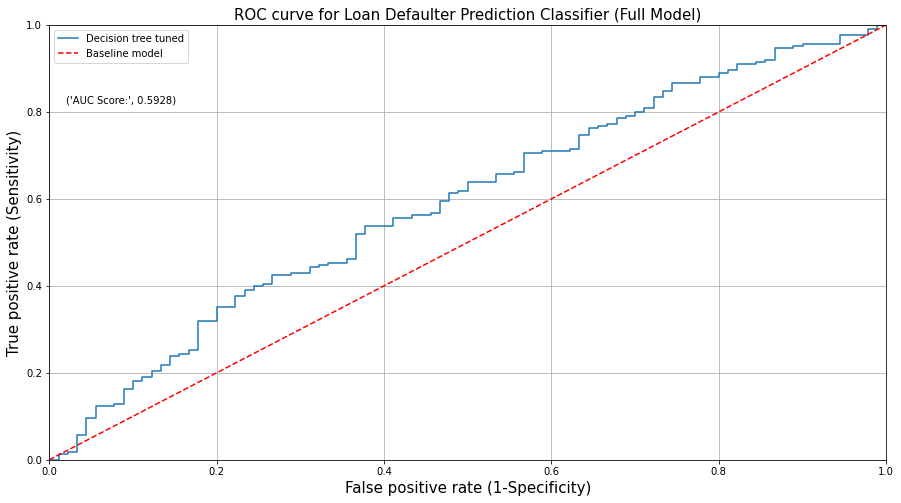

In [74]:
# Roc curve

plt.figure(figsize=[15,8])

y_test_lr_pred_proba = lr_model.predict_proba(X_test)[:,1]


# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test,y_test_lr_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr,label='Decision tree tuned')

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--',label='Baseline model')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(metrics.roc_auc_score(y_test,y_test_lr_pred_proba),4)))
                               
# plot the grid
plt.grid(True)

# displaying legends
plt.legend()

plt.show()

In [75]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.538095,0.377778,0.527956,0.160317
1,0.423810,0.266667,0.568815,0.157143
2,0.390476,0.233333,0.578690,0.157143
3,0.400000,0.244444,0.575493,0.155556
4,0.376190,0.222222,0.585928,0.153968


In [76]:
# convert probabilities to 0 and 1 using 'if_else'
y_test_rf_pred_youden = [ 0 if x < 0.527956 else 1 for x in y_test_lr_pred_proba]

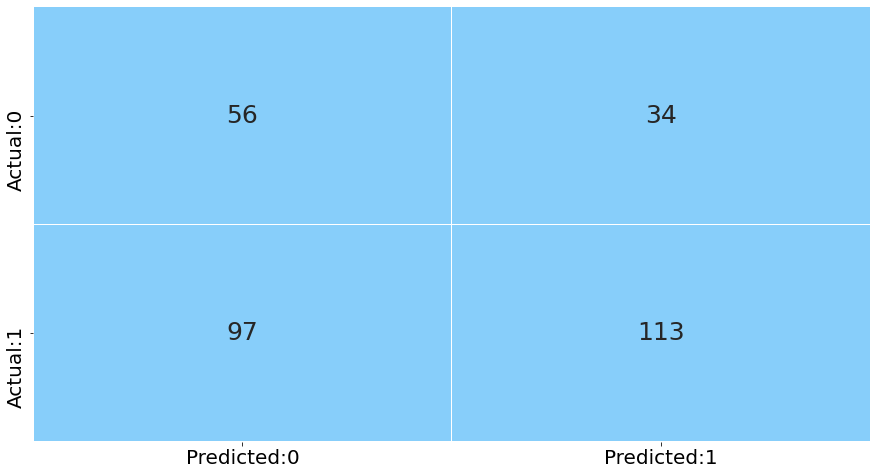

In [77]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test,y_test_rf_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [67]:
# Hyper tuning

lr=LogisticRegression(class_weight='balanced',random_state=10)
params={'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'penalty':['l1', 'l2', 'elasticnet', 'none']}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
GS=GridSearchCV(lr,params,cv=kf,n_jobs=-1,scoring='roc_auc')
GS.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=10, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=10),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc')

In [68]:
GS.best_params_

{'C': 0.8, 'penalty': 'l2'}

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [80]:
len(y_test_lr_pred_proba)

300

In [95]:
X_test.shape

(300, 2)

In [96]:
X_test['Creditability_predicted']=y_test_lr_pred

In [89]:
y_test.reset_index(drop=True,inplace=True)

In [97]:
final=pd.concat([X_test,y_test],axis=1)

In [98]:
final.isnull().sum()

CreditAmount                0
DurationOfCreditInMonths    0
Creditability_predicted     0
Creditability               0
dtype: int64

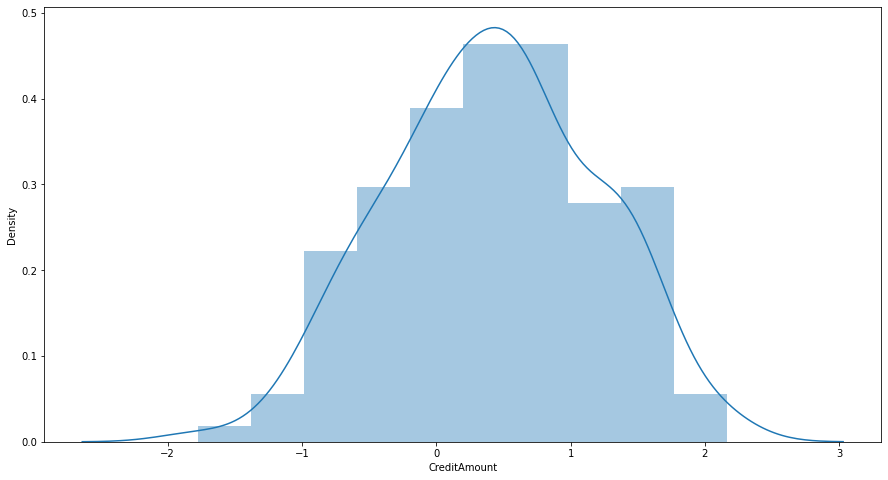

In [101]:
# predicted probability distribution of creditamount for defaults

cr_pred0=final[final['Creditability_predicted']==0]

plt.figure(figsize=[15,8])

sns.distplot(a=cr_pred0['CreditAmount'])

plt.show()

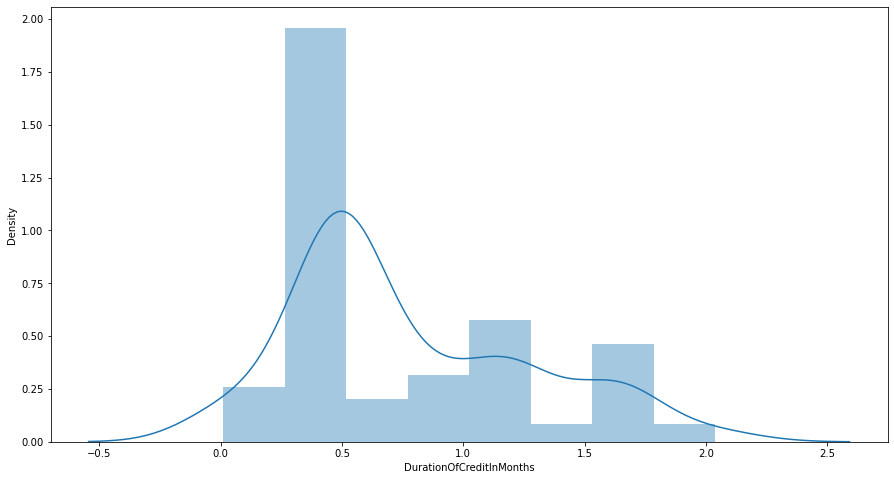

In [102]:
# predicted probability distribution of DurationOfCreditInMonths for defaults

cr_pred0=final[final['Creditability_predicted']==0]

plt.figure(figsize=[15,8])

sns.distplot(a=cr_pred0['DurationOfCreditInMonths'])

plt.show()

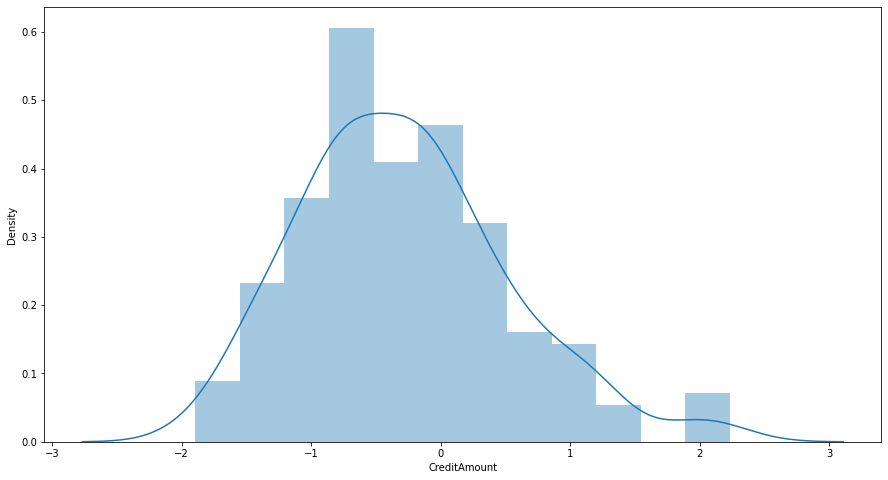

In [103]:
# predicted probability distribution of creditamount for non-defaults

cr_pred1=final[final['Creditability_predicted']==1]

plt.figure(figsize=[15,8])

sns.distplot(a=cr_pred1['CreditAmount'])

plt.show()

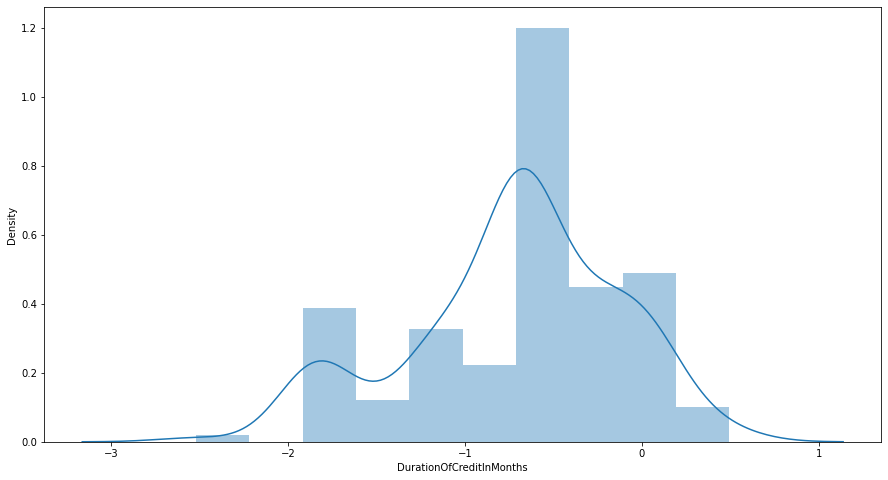

In [104]:
# predicted probability distribution of DurationOfCreditInMonths for non-defaults

cr_pred1=final[final['Creditability_predicted']==1]

plt.figure(figsize=[15,8])

sns.distplot(a=cr_pred1['DurationOfCreditInMonths'])

plt.show()